# PSEi Returns: Random Forest Regression


## Create some syntehtic data using scikit-learn's built-in regression generator

### Import libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Make a data frame and create basic visualizations

#### Load dataset

In [34]:
df_training = pd.read_csv('Base 4.1 Training.csv')
df_testing = pd.read_csv('Base 4.1 Back Test.csv')

X_training = df_training.iloc[:,7:]
X_test = df_testing.iloc[:,7:]

y_training = df_training.iloc[:,5] - df_training.iloc[:,6]
y_test = df_testing.iloc[:,5] - df_testing.iloc[:,6]

## How will a Decision Tree regressor do?

Every run will generate different result but on most occassions, **the single decision tree regressor is likely to learn spurious features** i.e. will assign small importance to features which are not true regressors.

In [35]:
from sklearn import tree

In [39]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X_training,y_training)

DecisionTreeRegressor(max_depth=5)

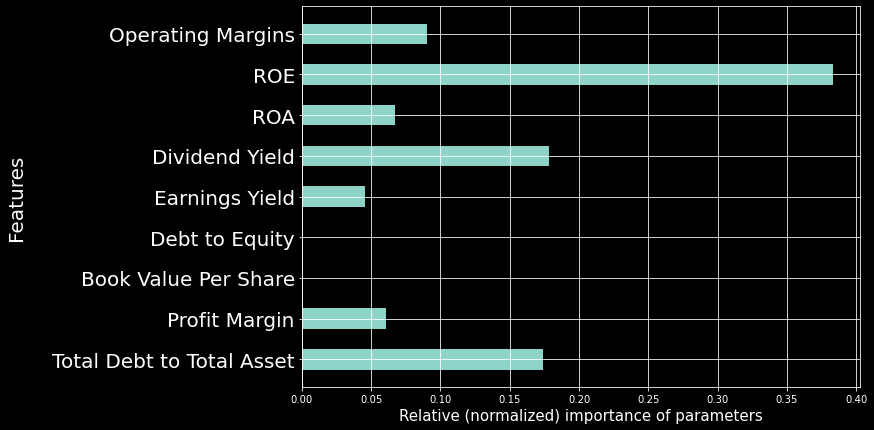

In [41]:
n_features =9

# print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features,0,-1),X_training.columns,fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features,0,-1),width=tree_model.feature_importances_,height=0.5)

#### Print the $R^2$ score of the Decision Tree regression model

In [49]:
print("Regression coefficient:",tree_model.score(X_training,y_training))

Regression coefficient: 0.1978496756731274


## Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X_training, y_training)

RandomForestRegressor(max_depth=5, max_leaf_nodes=5)

#### Print the relative importance of the features

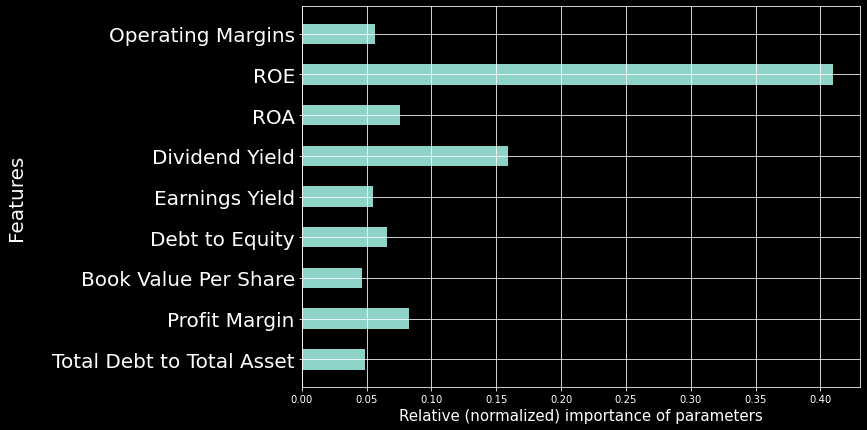

In [46]:
# print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),X_training.columns,fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

#### Print the $R^2$ score of the Random Forest regression model

In [50]:
print("Regression coefficient:",model.score(X_training,y_training))

Regression coefficient: 0.10440783735919479


## Benchmark to statsmodel (ordinary least-square solution by exact analytic method)

[Statsmodel is a Python module](http://www.statsmodels.org/dev/index.html) that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

In [51]:
import statsmodels.api as sm

In [52]:
Xs=sm.add_constant(X_training)
stat_model = sm.OLS(y_training,Xs)
stat_result = stat_model.fit()

In [53]:
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.507
Date:                Tue, 27 Feb 2024   Prob (F-statistic):              0.141
Time:                        07:05:13   Log-Likelihood:                 505.48
No. Observations:                 713   AIC:                            -991.0
Df Residuals:                     703   BIC:                            -945.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Show the relative importance of regressors side by side

For Random Forest Model, show the relative importance of features as determined by the meta-estimator. For the OLS model, show normalized t-statistic values.

**It will be clear that although the RandomForest regressor identifies the important regressors correctly, it does not assign the same level of relative importance to them as done by OLS method t-statistic**

In [54]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=X_training.columns,
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,Operating Margins,ROE,ROA,Dividend Yield,Earnings Yield,Debt to Equity,Book Value Per Share,Profit Margin,Total Debt to Total Asset
RF Regressor relative importance,0.063222,0.338386,0.076218,0.188575,0.079929,0.047846,0.084973,0.086598,0.034251
OLS method normalized t-statistic,-0.248715,1.180878,0.184217,-0.337372,-0.311580,-0.158920,0.084314,0.592006,0.015173
